In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from random import random



In [2]:
###########
#Funciones#
###########

def f1(x):
    return x**(-3)

def f2(x):
    return x**(-0.5)

def f3(x,y,z):
    return (1/x + y + z**2)

def Es_2(X,num,f):
    E=0
    for i in range(num):
        E+=(1/num)*f(X[i])
    return E

def S2_2(X,num,f):
    S=0
    E=Es_2(X,num,f)
    for i in range(num):
        S+=(1/num)*(f(X[i])**2-E**2)
    return S

def Es_3(X,Y,Z,num,f):
    E=0
    for i in range(num):
        for j in range(num):
            for k in range(num):
                E+=(1/num**3)*f(X[i],Y[j],Z[k])
    return E

def S2_3(X,Y,Z,num,f):
    S=0
    E=Es_3(X,Y,Z,num,f)
    for i in range(num):
        for j in range(num):
            for k in range(num):
                S+=(1/num**3)*(f(X[i],Y[j],Z[k])**2-E**2)
    return S
    

In [3]:
NumDatos=[100,1000,10000]

#Monte Carlo para funciones 1-D

E_2=[[],[]]
S_2=[[],[]]

for i in NumDatos:
    X=[]
    while len(X)<(i):
        X.append( 1 + (random()*(10-(1))))
    #print (len(X))
    E_2[0].append(Es_2(X,i,f1))
    S_2[0].append(S2_2(X,i,f1))
    
for i in NumDatos:
    X=[]
    while len(X)<(i):
        X.append( 1 + (random()*(10-(1))))
    #print (len(X))
    E_2[1].append(Es_2(X,i,f2))
    S_2[1].append(S2_2(X,i,f2))

E_p_2=[[],[]]
S_p_2=[[],[]]
for i in range(len(E_2[0])):
    E_p_2[0].append(E_2[0][i]*(10-1))
    E_p_2[1].append(E_2[1][i]*(10-1))
    S_p_2[0].append(S_2[0][i]*(10-1))
    S_p_2[1].append(S_2[1][i]*(10-1))
    

In [4]:
#Monte Carlo para funcion 3-D

E_3=[]
S_3=[]

#for i in NumDatos:
i=100    #No pude hacerlo con más puntos porque el loop se tarda mucho tiempo
X=[]
Y=[]
Z=[]
while len(X)<(i):
    X.append( 1 + (random()*(10-(1))))
    Y.append( 0 + (random()*(2-(0))))
    Z.append( 0 + (random()*(2-(0))))
    #print (len(X))
E_3.append(Es_3(X,Y,Z,i,f3))
S_3.append(S2_3(X,Y,Z,i,f3))

E_p_3=[]
S_p_3=[]
for i in range(len(E_3)):
    E_p_3.append(E_3[i]*(10-1)*(2-0)*(2-0))
    S_p_3.append(S_3[i]*(10-1)*(2-0)*(2-0))
    

In [5]:
# Estimados para funcioines 1-D (100,1000,10000) puntos la enrada [0] para f1 y [1] para f2  

print(E_p_2[0],E_p_2[1]) 
print(E_2[0],E_2[1])     
print(S_2[0],S_2[1])

[0.481504104230455, 0.4447723595584566, 0.49721111110757926] [4.0211601199334295, 4.302833289404165, 4.332179336898805]
[0.05350045602560611, 0.049419151062050734, 0.05524567901195325] [0.4467955688814922, 0.47809258771157387, 0.48135325965542275]
[0.01932874070078331, 0.01500478669303989, 0.019787039391667875] [0.013394870938016574, 0.023086416609406243, 0.02558097352597523]


In [6]:
#Integracion de ScyPy funciones 1-D

I1=quad(f1,1,10)  
I2=quad(f2,1,10) 
print (I1,I2)

(0.495, 3.33106475941296e-10) (4.32455532033676, 1.6881526376757614e-09)


In [7]:
# Estimados para funcioines 3-D

E_3,E_p_3,S_3

([2.880749598855883], [103.70698555881178], [1.7276129585272062])

Text(0.5, 1.0, 'Estimado con $f(x)= x^{-1/2}$')

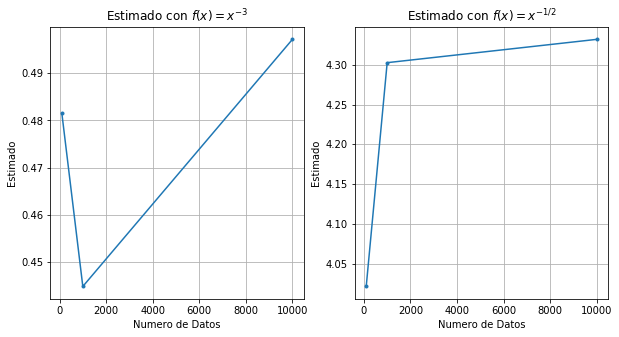

In [8]:
#Graficas funciones 1-D

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
#fig.suptitle()
ax1.plot(NumDatos,E_p_2[0],'.-')
ax1.grid()
ax1.set_xlabel('Numero de Datos')
ax1.set_ylabel('Estimado')
ax1.set_title(r'Estimado con $f(x)= x^{-3}$')

ax2.plot(NumDatos,E_p_2[1],'.-')
ax2.grid()
ax2.set_xlabel('Numero de Datos')
ax2.set_ylabel('Estimado')
ax2.set_title(r'Estimado con $f(x)= x^{-1/2}$')


In [9]:
#Stratified sampling

In [10]:
I=[]   #Intervalos
i=0
I.append(1.0)

x_max=10
x_min=1
h=np.abs(x_min-x_max)/10.
while i< 10:
    i+=1
    I.append(1 + i*h)
    

In [11]:

NumIntervalos=10
E_1=[]
for i in NumDatos:
    #i=100
    Xinter=[[],[],[],[],[],[],[],[],[],[]]
    #Ej=[[],[],[],[],[],[],[],[],[],[]]
    Ej=[]
    Nj=i/NumIntervalos
    x_max=10
    x_min=1
    h=np.abs(x_min-x_max)/10.
    for j in range(NumIntervalos):
   
        while len(Xinter[j])<(Nj):
            Xinter[j].append(I[j] + (random()*(I[j+1]-I[j])))
        ej=0
        for k in range(len(Xinter[j])):
            ej+=(h/len(Xinter[j]))*f1(Xinter[j][k])
        Ej.append(ej)
    ej_1=0
    for l in range(len(Ej)):
        ej_1+=Ej[l]
    E_1.append(ej_1)
        
    


 
    

In [12]:
E_1 # Estimado usando Stratified sampling para la funcion f1           

[0.4263195548615456, 0.48994086328386904, 0.5078094343014121]

Text(0.5, 1.0, 'Estimado con $f(x)= x^{-3}$ usando stratified sampling ')

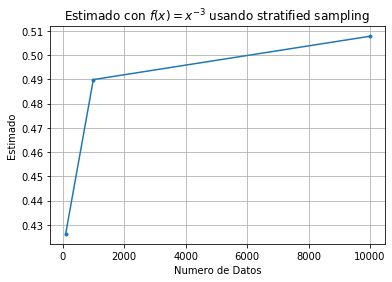

In [13]:
plt.figure(figsize=(6,4))

plt.plot(NumDatos,E_1,'.-')
plt.grid()
plt.xlabel('Numero de Datos')
plt.ylabel('Estimado')
plt.title(r'Estimado con $f(x)= x^{-3}$ usando stratified sampling ')